<h2>Class Assignment Week 9<br>
Sherin Alvinia Yonatan - 0706022310013

## Import Library

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [102]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [103]:
# rename
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran","Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [104]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [105]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [106]:
# data shape
df.shape

(308, 12)

In [107]:
# check missing values
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah,0
Luas Bangunan,0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran,0
Terjual/Belum,0
Arah Hadap Rumah,0


In [108]:
# check duplicate values
df.duplicated().sum()

np.int64(3)

In [109]:
df = df.drop_duplicates()

In [110]:
df.duplicated().sum()

np.int64(0)

In [111]:
# drop column terjual/belum
df = df.drop(columns=['Terjual/Belum'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            305 non-null    object
 1   Nama Daerah              305 non-null    object
 2   Luas Tanah               305 non-null    int64 
 3   Luas Bangunan            305 non-null    int64 
 4   Jumlah Kamar             305 non-null    int64 
 5   Jumlah Kamar Mandi       305 non-null    int64 
 6   Tingkat/Lantai           305 non-null    int64 
 7   Harga Penawaran          305 non-null    int64 
 8   Arah Hadap Rumah         305 non-null    object
 9   Posisi Rumah             305 non-null    object
 10  Lebar Jalan Depan Rumah  305 non-null    object
dtypes: int64(6), object(5)
memory usage: 28.6+ KB


In [113]:
# Check Unique
# So, that it's also can help me to know which one is need to be categorical as ordinal and nominal by looking at the values.
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [114]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("=== Unique Values for Each Categorical Column ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
df[col].unique()


=== Unique Values for Each Categorical Column ===

Column: Area Category

Column: Nama Daerah

Column: Arah Hadap Rumah

Column: Posisi Rumah

Column: Lebar Jalan Depan Rumah


array(['1-2 Mobil', '< 1 Mobil', '> 2 Mobil'], dtype=object)

In [115]:
from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal untuk label encoding
label_cols = ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,3,2,0
1,0,100,30,60,2,1,2,287799000,3,2,1
2,3,48,170,170,5,4,2,2699999999,1,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,2,0


In [116]:
df["Nama Daerah"] = (
    df["Nama Daerah"]
    .astype(str) # pastikan semua string
    .str.strip() # hapus semua space lebih
    .str.title() # ubah kapital
)
df = df[df["Nama Daerah"].str.len() > 2] # there is a daerah that only "SU"
df = df.sort_values("Nama Daerah").reset_index(drop=True)
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,0,100,30,60,2,1,2,287799000,3,2,1
1,0,100,26,50,2,2,2,310000000,3,2,1
2,0,101,36,36,2,1,2,340000000,3,2,1
3,3,102,66,180,4,3,3,2000000000,1,2,0
4,1,103,57,101,3,1,2,1376000000,3,2,2


## Exploratory Data Analysis

/tmp/ipython-input-34668375.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Area Category Label', y='Harga Penawaran',


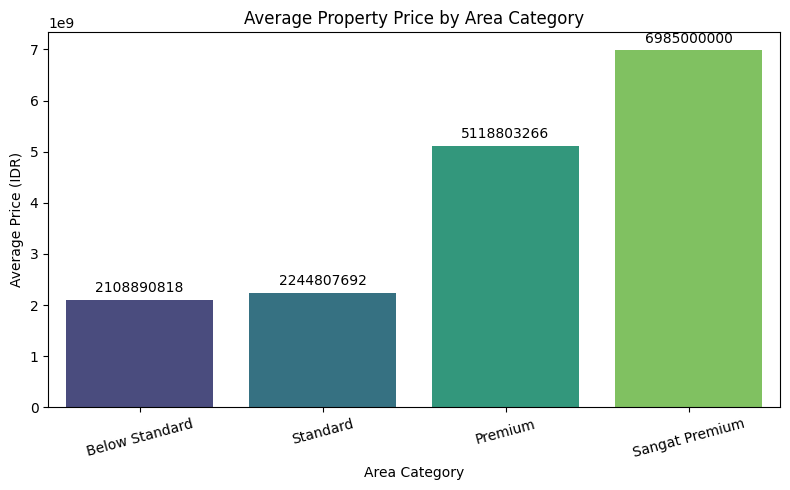

In [117]:
# Visualization 1: Average Property Price by Area Category
# Recreate mapping for better readability
category_mapping = {
    0: 'Below Standard',
    1: 'Premium',
    2: 'Sangat Premium',
    3: 'Standard'
}

df['Area Category Label'] = df['Area Category'].map(category_mapping)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='Area Category Label', y='Harga Penawaran',
                 estimator='mean', errorbar=None, palette='viridis')

plt.title('Average Property Price by Area Category')
plt.ylabel('Average Price (IDR)')
plt.xlabel('Area Category')
plt.xticks(rotation=15)
plt.tight_layout()

# Add numeric labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()


The bar chart shows that properties located in Premium and Sangat Premium areas have the highest average prices, while Below Standard and Standard areas tend to have significantly lower average prices. This indicates that location category plays a major role in determining property value, properties in highly desirable or developed areas command higher prices due to better infrastructure, accessibility, and amenities. In contrast, properties in below-standard areas are likely less accessible or lack surrounding facilities, reducing their market value.

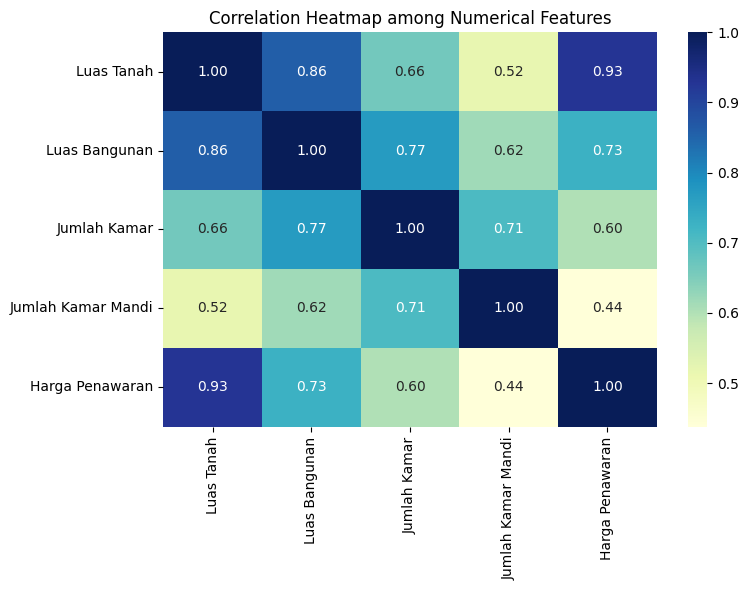

In [118]:
# Visualization 2: Correlation Heatmap of Numerical Features
plt.figure(figsize=(8,6))
sns.heatmap(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar','Jumlah Kamar Mandi', 'Harga Penawaran']].corr(),
            annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap among Numerical Features')
plt.tight_layout()
plt.show()


The heatmap reveals that land area (Luas Tanah) and building area (Luas Bangunan) are strongly correlated with each other (0.86) and both have a strong positive correlation with property price (Harga Penawaran), especially land area (0.93). This suggests that larger land and building sizes significantly increase property value. Meanwhile, the number of bedrooms and bathrooms shows moderate correlations (0.60 and 0.44, respectively), implying that while these factors contribute to price, they are less influential compared to land and building area. Overall, the visualization indicates that property size is the most critical determinant of price in this dataset.

## Data Preparation for Clustering

In [119]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran
0,-0.948558,-1.010153,-1.217595,-1.342347,-0.783773
1,-0.971081,-1.073267,-1.217595,-0.676910,-0.778160
2,-0.914775,-1.161627,-1.217595,-1.342347,-0.770577
3,-0.745857,-0.252783,-0.020637,-0.011473,-0.350950
4,-0.796533,-0.751385,-0.619116,-1.342347,-0.508689


In [120]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran
count,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
mean,4.785444e-17,-9.953724e-17,1.033656e-16,2.297013e-17,2.679849e-17
std,1.008734e+00,1.008734e+00,1.008734e+00,1.008734e+00,1.008734e+00
min,-1.027386e+00,-1.287855e+00,-1.816074e+00,-1.342347e+00,-8.160785e-01
25%,-5.980547e-01,-5.683537e-01,-6.191163e-01,-6.769100e-01,-5.152614e-01
50%,-2.897806e-01,-2.843401e-01,-2.063721e-02,-1.147305e-02,-2.751132e-01
75%,2.338631e-01,4.730295e-01,5.778418e-01,6.539639e-01,1.135476e-01
max,4.186529e+00,3.344723e+00,2.971758e+00,3.315712e+00,5.463163e+00


In [123]:
n_clusters_list = [2, 3, 4, 5, 6]
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan']

results = []

for linkage in linkage_methods:
    for metric in distance_metrics:
        # Ward only supports Euclidean
        if linkage == 'ward' and metric != 'euclidean':
            continue
        for n in n_clusters_list:
            try:
                model = AgglomerativeClustering(n_clusters=n, linkage=linkage, metric=metric)
                labels = model.fit_predict(df_scaled)
                sil_score = silhouette_score(df_scaled, labels)
                results.append((n, linkage, metric, sil_score))
            except Exception:
                continue

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['n_clusters', 'linkage', 'metric', 'silhouette_score'])
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10))

    n_clusters   linkage     metric  silhouette_score
30           2    single  manhattan          0.661281
25           2    single  euclidean          0.661281
5            2  complete  euclidean          0.630548
20           2   average  manhattan          0.630548
15           2   average  euclidean          0.630548
10           2  complete  manhattan          0.574308
26           3    single  euclidean          0.564907
21           3   average  manhattan          0.564907
31           3    single  manhattan          0.564907
16           3   average  euclidean          0.564907


Skipping Ward linkage with Manhattan metric (not supported).


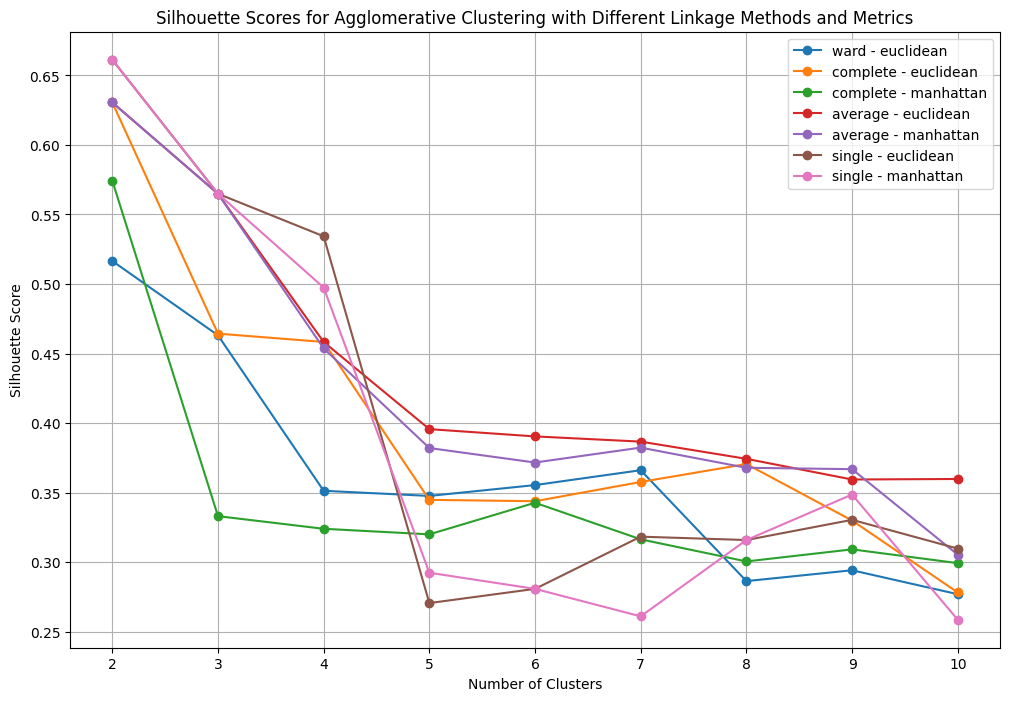

Best Silhouette Score: 0.661280912707836
Optimal Number of Clusters: 2
Optimal Linkage Method: single
Optimal Metric: euclidean


In [122]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Hierarchical Clustering Modeling

In [128]:
del metric  # remove overwritten variable if it exists
del linkage  # if overwritten accidentally
from scipy.cluster.hierarchy import linkage


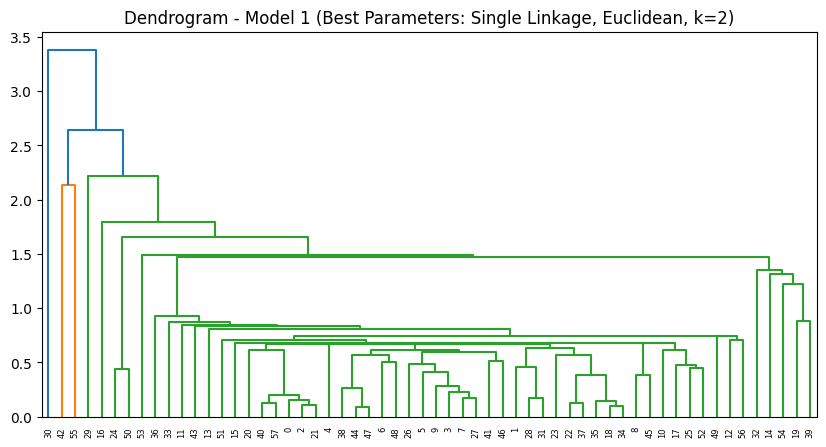

In [130]:
# Model 1
best_linkage = 'single'
best_metric = 'euclidean'
best_n_clusters = 2

# Dendrogram
Z1 = linkage(df_scaled, method=best_linkage, metric=best_metric)
plt.figure(figsize=(10, 5))
plt.title("Dendrogram - Model 1 (Best Parameters: Single Linkage, Euclidean, k=2)")
dendrogram(Z1)
plt.show()

# Fit clustering
model1 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
df_scaled['Cluster_Model1'] = model1.fit_predict(df_scaled)

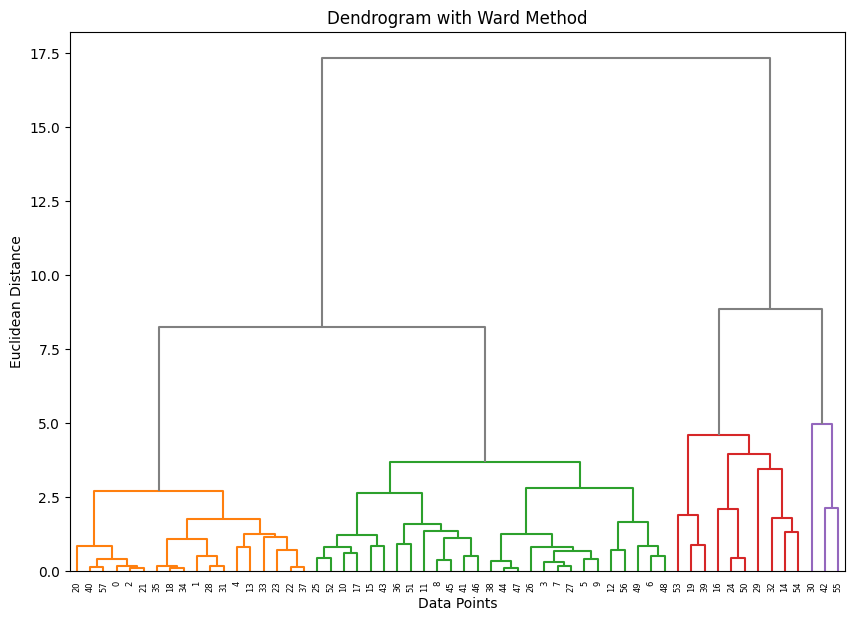

In [134]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

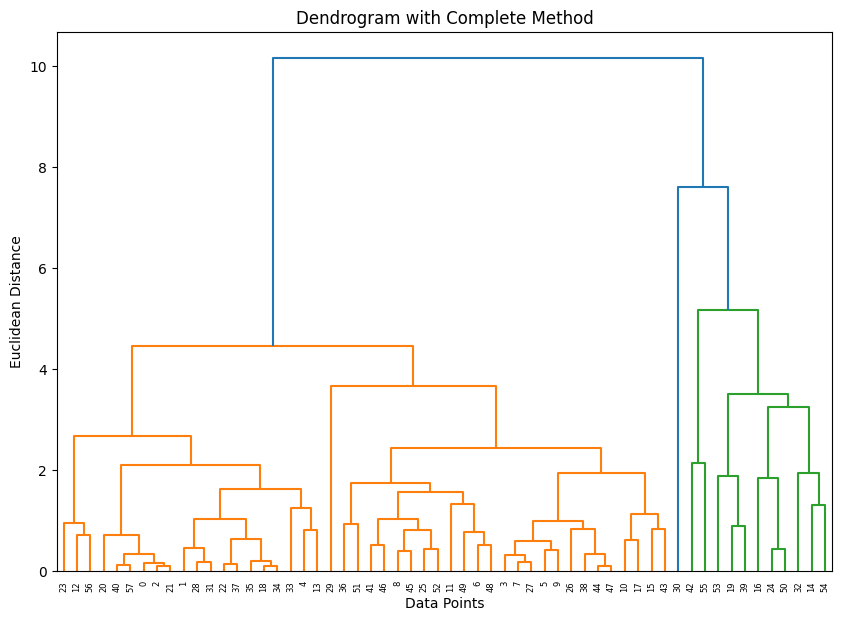

In [135]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

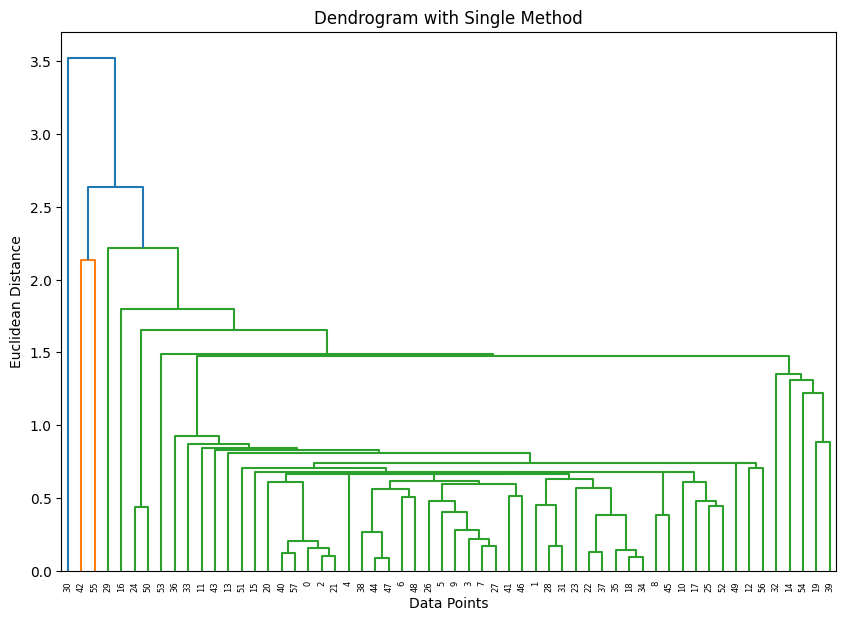

In [136]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

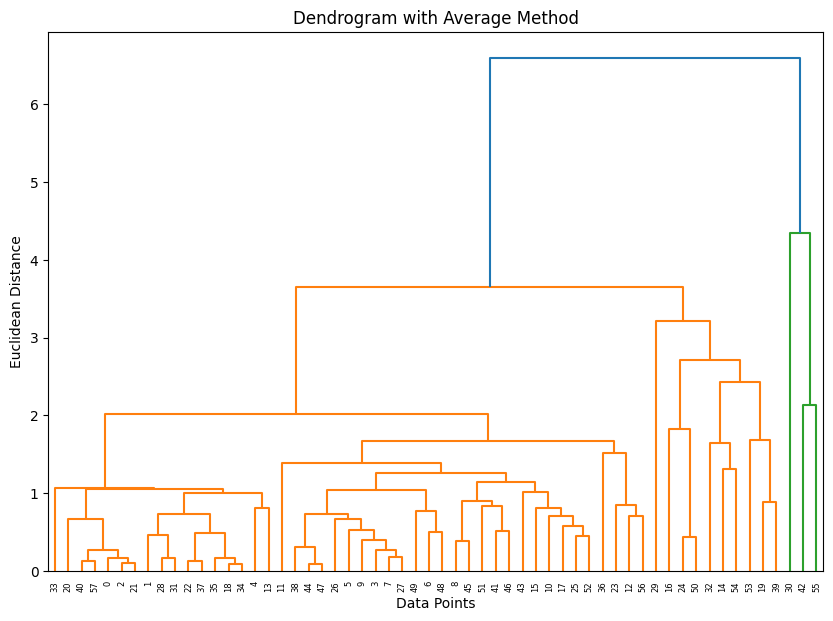

In [137]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [131]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [132]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.6593798456884895


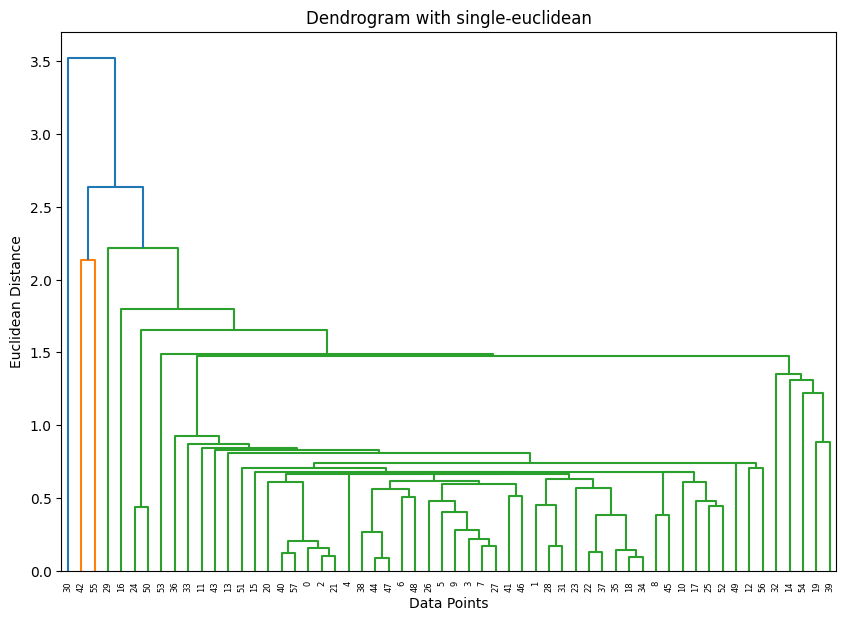

In [138]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [139]:
# MERGE
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Area Category Label,Agglo
0,0,100,30,60,2,1,2,287799000,3,2,1,Below Standard,0
1,0,100,26,50,2,2,2,310000000,3,2,1,Below Standard,0
2,0,101,36,36,2,1,2,340000000,3,2,1,Below Standard,0
3,3,102,66,180,4,3,3,2000000000,1,2,0,Standard,0
4,1,103,57,101,3,1,2,1376000000,3,2,2,Premium,0


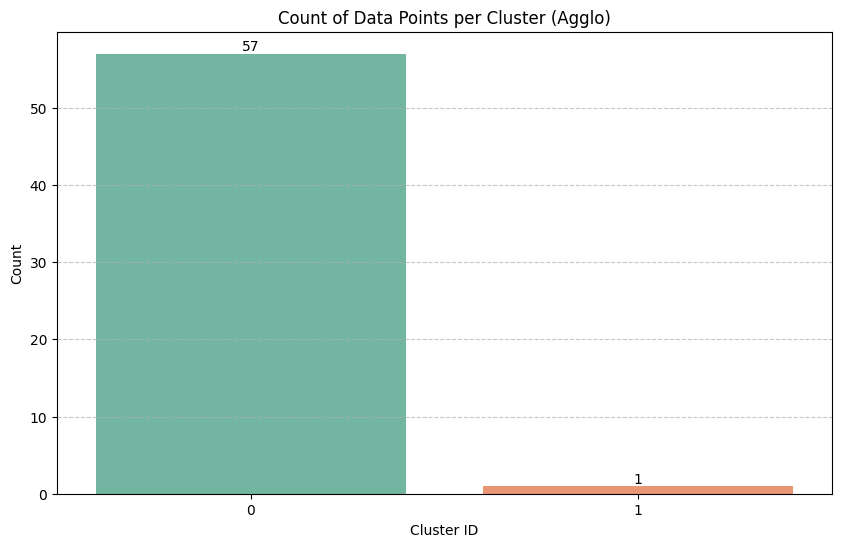

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [143]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Bangunan'
y_col = 'Harga Penawaran'
z_col = 'Luas Tanah'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [146]:
# Statistical Summary for each cluster
df.columns = df.columns.str.strip()
cluster_summary = df.groupby('Agglo').agg({
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'min', 'max'],
    'Tingkat/Lantai': ['mean', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('Cluster')
cluster_summary

Luas Tanah                       Luas Bangunan                        \
               mean         std  min  max          mean         std  min  max   
Cluster                                                                         
0        185.421053  150.410978   16  754     212.77193  151.235509   16  750   
1        942.000000         NaN  942  942     635.00000         NaN  635  635   

        Jumlah Kamar      ... Jumlah Kamar Mandi         Tingkat/Lantai      \
                mean min  ...               mean min max           mean min   
Cluster                   ...                                                 
0           3.964912   1  ...           3.017544   1   8       1.754386   1   
1           8.000000   8  ...           3.000000   3   3       1.000000   1   

            Harga Penawaran                                          
        max            mean           std          min          max  
Cluster                                                              
0         3    3.009166e+09  2.778706e+09    160000000  14000000000  
1         1    2.500000e+10           NaN  25000000000  25000000000  

[2 rows x 21 columns]

Managerial Implications Based on Clustering Results<br><br>
Cluster 0 (n = 19) -> Standard, Premium Houses with Medium Size and Mid Range Prices

Profile:
Average land area of 185 m², building area of 213 m², with 4 bedrooms, 3 bathrooms, 2 floors, and an average listing price around IDR 3 billion.

Interpretation:
This cluster represents middle to upper-middle-class families looking for comfortable, ready-to-move-in houses in strategic locations. Buyers in this segment tend to value functionality, accessibility, and family comfort more than luxury.

Strategies:

Focus on competitive pricing strategies (IDR 2–4 billion) with flexible financing options such as low down payments or installment plans.

Highlight family-oriented features like safety, proximity to schools, and modern design.

Utilize digital marketing and social media to reach young professionals or newly married couples.

Partner with local real estate agencies to expand the buyer network.

KPI focus:
Sales volume, average days on market, and lead-to-sale conversion rate.

Cluster 1 (n = 1)<br><br>
Cluster 1 (n = 1)-> Luxury Property Segment (Outlier)

Profile:
This cluster contains a single high-end property with a very large land and building area, significantly above the dataset’s average. It features multiple bedrooms, premium facilities, and a much higher price point (above IDR 7 billion).

Interpretation:
This outlier represents the luxury housing market, which targets high-income buyers or investors seeking exclusivity, privacy, and long-term value. The extreme values in this cluster indicate niche demand rather than a general trend.

Strategies:

Focus on personalized marketing (private showings, premium listings, and partnerships with luxury agents).

Highlight exclusive benefits, such as architectural uniqueness, location prestige, and investment potential.

Consider international marketing channels for foreign investors interested in Indonesian high-end properties.

KPI focus:
Average profit margin per sale, number of qualified high net worth leads, and average negotiation period.

Overall Managerial Insight

The clustering results suggest that the majority of the property market falls within the mid-range housing segment, where buyers prioritize practicality and affordability. The presence of a small luxury segment indicates diversification opportunities, but it requires a different marketing and pricing approach.

For decision-makers, this segmentation can guide:

Pricing strategies: Align house prices according to segment-specific purchasing power.

Marketing focus: Concentrate digital campaigns on the medium-segment audience, while maintaining premium branding for luxury listings.

Product development: Design future housing projects that balance affordability with comfort to attract the largest market share.